# Visualización
  El objetivo de esta visualización es ver segun el DataSet desde lo Macro a lo Micro, para ver como esta Chile en comparacion a los otros paises del mundo y Latam.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Especifica la ruta al archivo CSV
file_path = '../Data/IEAGlobalEVData2024.csv'

# Lee el archivo CSV
df = pd.read_csv(file_path)
# Filtro de solo datos historicos
df_h=df[df['category'] == 'Historical']
# Eliminación de datos relacionados al desplazamiento de petroleo
df_h = df_h[~df_h['parameter'].isin(['Oil displacement Mbd', 'Oil displacement, million lge'])]
# Crear un diccionario que mapea cada país a su región
region_map = {
    'World': 'Global',
    'Europe': 'Global',
    'China': 'Asia',
    'Rest of the world': 'Global',
    'USA': 'North America',
    'India': 'Asia',
    'EU27': 'Global',
    'Netherlands': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Japan': 'Asia',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Korea': 'Asia',
    'Finland': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'New Zealand': 'Oceania',
    'Brazil': 'Latam',
    'Israel': 'Asia',
    'Austria': 'Europe',
    'Iceland': 'Europe',
    'Chile': 'Latam',
    'Australia': 'Oceania',
    'Mexico': 'Latam',
    'Greece': 'Europe',
    'South Africa': 'Africa',
    'Turkiye': 'Asia',
    'Latvia': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'Colombia': 'Latam',
    'Costa Rica': 'Latam',
    'Bulgaria': 'Europe',
    'Estonia': 'Europe',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Slovakia': 'Europe',
    'Romania': 'Europe',
    'Lithuania': 'Europe',
    'Seychelles': 'Africa',
    'United Arab Emirates': 'Asia',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Thailand': 'Asia',
    'Cyprus': 'Europe',
    'Indonesia': 'Asia'
}

# Crear la nueva columna 'region_category' en el DataFrame
df_h['region_category'] = df_h['region'].map(region_map)



## Analisis por Regiones

### Estado de Vehiculos Electricos por continente

Del grafico se puede desprender que el principal desarrollo de la electromovilidad esta concentrado en Asia y Europa, con Latam muy por detras de los otros bloques de paises. Se observa que la gran fuerza de desarrollo de la electromovilidad esta asociada a la venta de autos por sobre otros tipos.

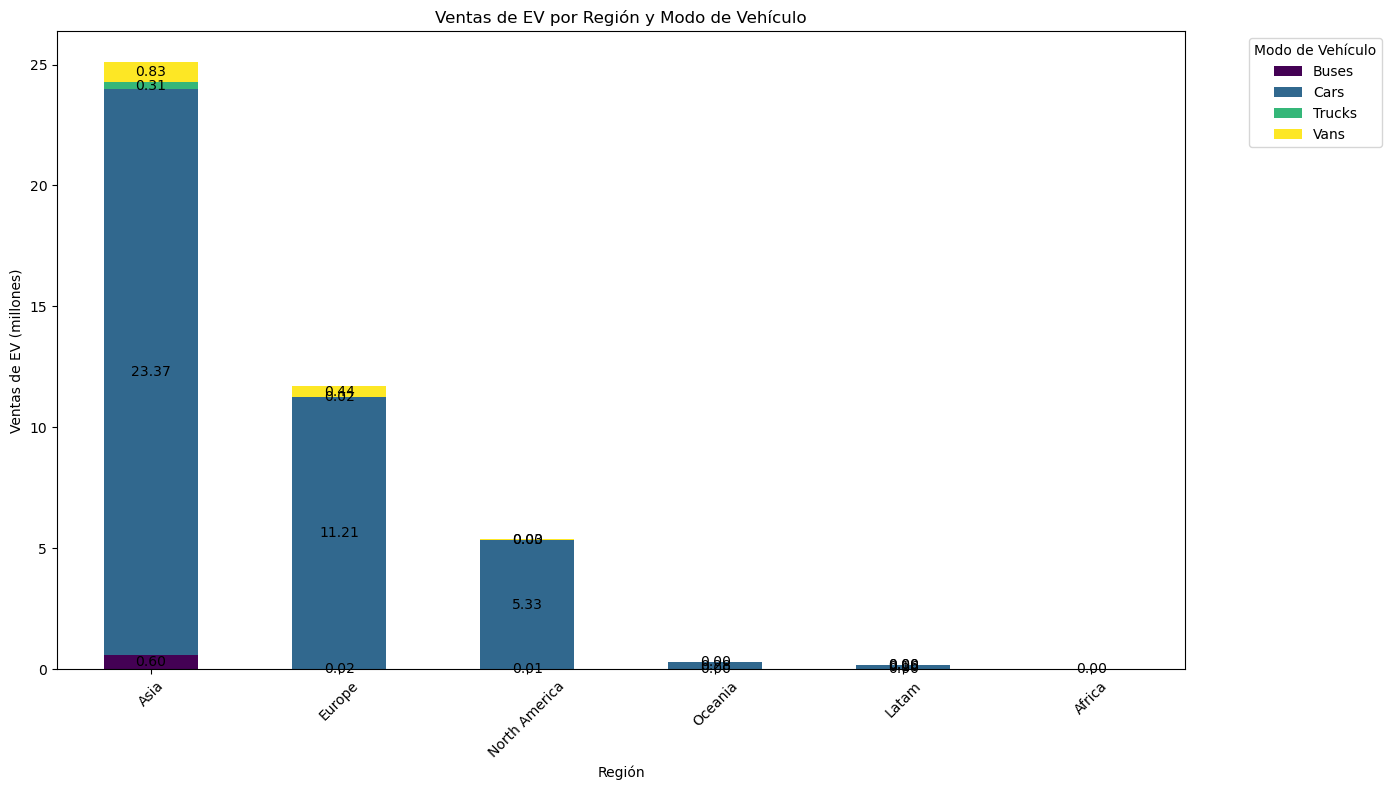

In [114]:
# Filtrar los datos para EV sales y excluir las categorías globales
filtered_ev_sales = df_h[(df_h['parameter'] == 'EV sales') & (df_h['region_category'] != 'Global')]

# Agrupar los datos por 'region_category' y 'mode', y sumar las ventas
ev_sales_by_region_mode = filtered_ev_sales.groupby(['region_category', 'mode'])['value'].sum().reset_index()

# Convertir las ventas a millones
ev_sales_by_region_mode['value'] = ev_sales_by_region_mode['value'] / 1_000_000

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_pivot = ev_sales_by_region_mode.pivot(index='region_category', columns='mode', values='value').fillna(0)

# Ordenar las regiones por las ventas totales
ev_sales_pivot = ev_sales_pivot.loc[ev_sales_pivot.sum(axis=1).sort_values(ascending=False).index]

# Crear el gráfico de barras apiladas
ax = ev_sales_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV por Región y Modo de Vehículo')
plt.xlabel('Región')
plt.ylabel('Ventas de EV (millones)')
plt.xticks(rotation=45)
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir las anotaciones de los valores en el gráfico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

### Evolucion de la electromovilidad en el tiempo por Región:

El siguiente grafico muestra el crecieminto que a experimentado la electromovilidad en los ultimos años, donde se aprecia que hacia a tenido un aumento significativo los ultimos 4 años.

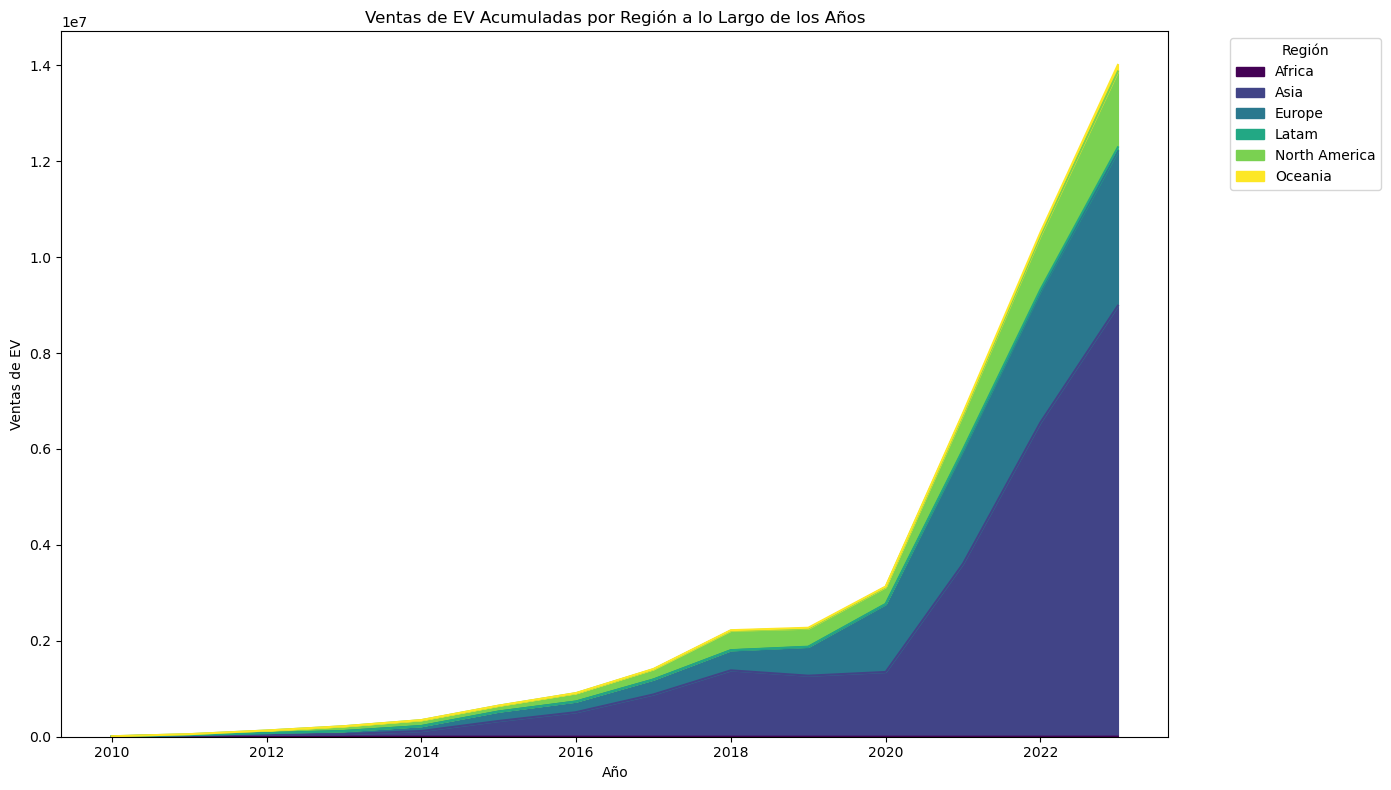

In [21]:
# Agrupar los datos por 'region_category' y 'year', y sumar las ventas
ev_sales_by_region_year = filtered_ev_sales.groupby(['region_category', 'year'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_pivot = ev_sales_by_region_year.pivot(index='year', columns='region_category', values='value').fillna(0)

# Crear el gráfico de área apilado
ev_sales_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV Acumuladas por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de EV')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Electromovilidad en Latino America
### Crecimiento en el tiempo de la electromovilidad en latino america:

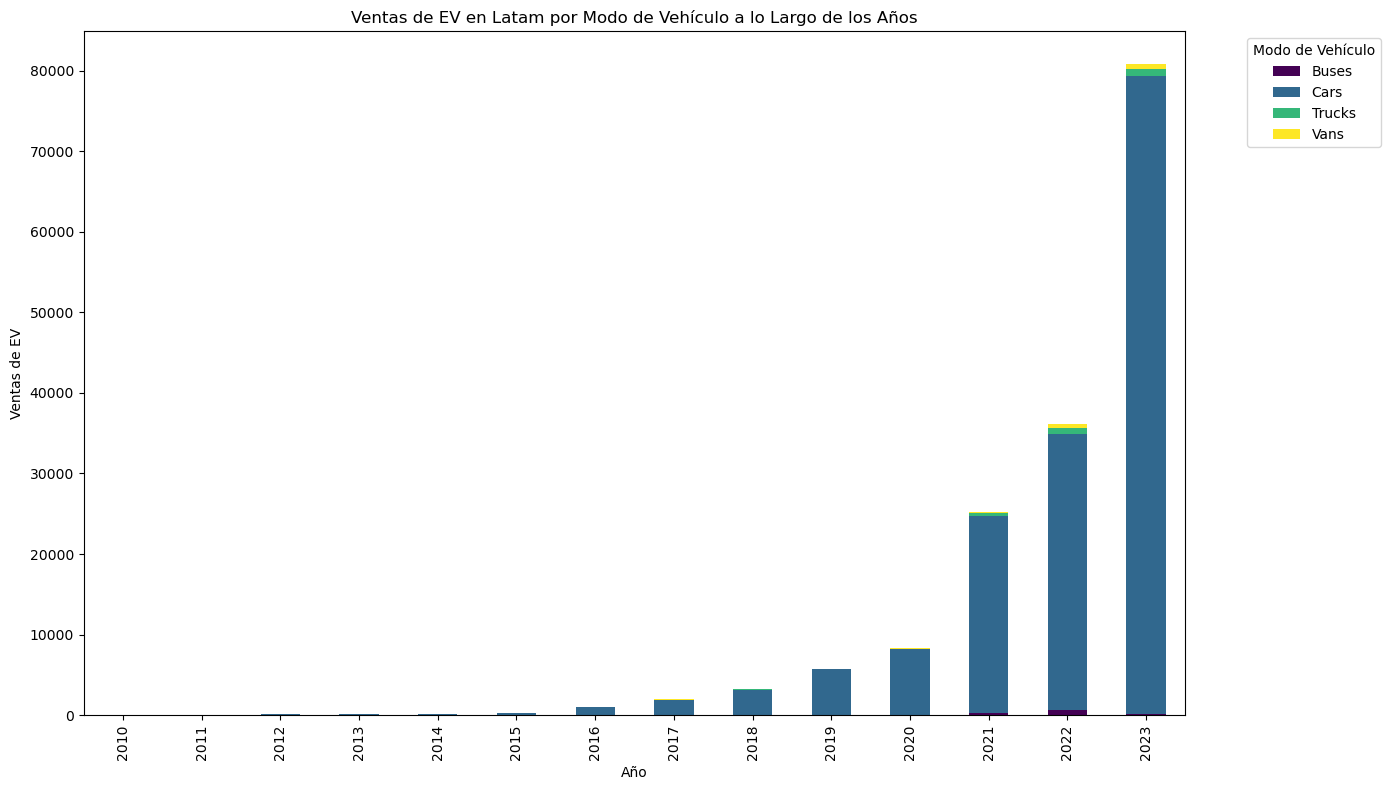

In [129]:
# Filtrar los datos para EV sales, excluir las categorías globales, y seleccionar solo 'Latam'
filtered_ev_sales_latam = df_h[(df_h['parameter'] == 'EV sales') & 
                               (df_h['region_category'] == 'Latam')]

# Agrupar los datos por 'year' y 'mode', y sumar las ventas
ev_sales_latam_by_year_mode = filtered_ev_sales_latam.groupby(['year', 'mode'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_pivot = ev_sales_latam_by_year_mode.pivot(index='year', columns='mode', values='value').fillna(0)

# Crear el gráfico de barras apiladas
ev_sales_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV en Latam por Modo de Vehículo a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de EV')
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


El grafico muestra la tendencia de los ultimos años de la compra de vehiculos electricos en Latam, con un despegue significativo los ultimos 3 años.

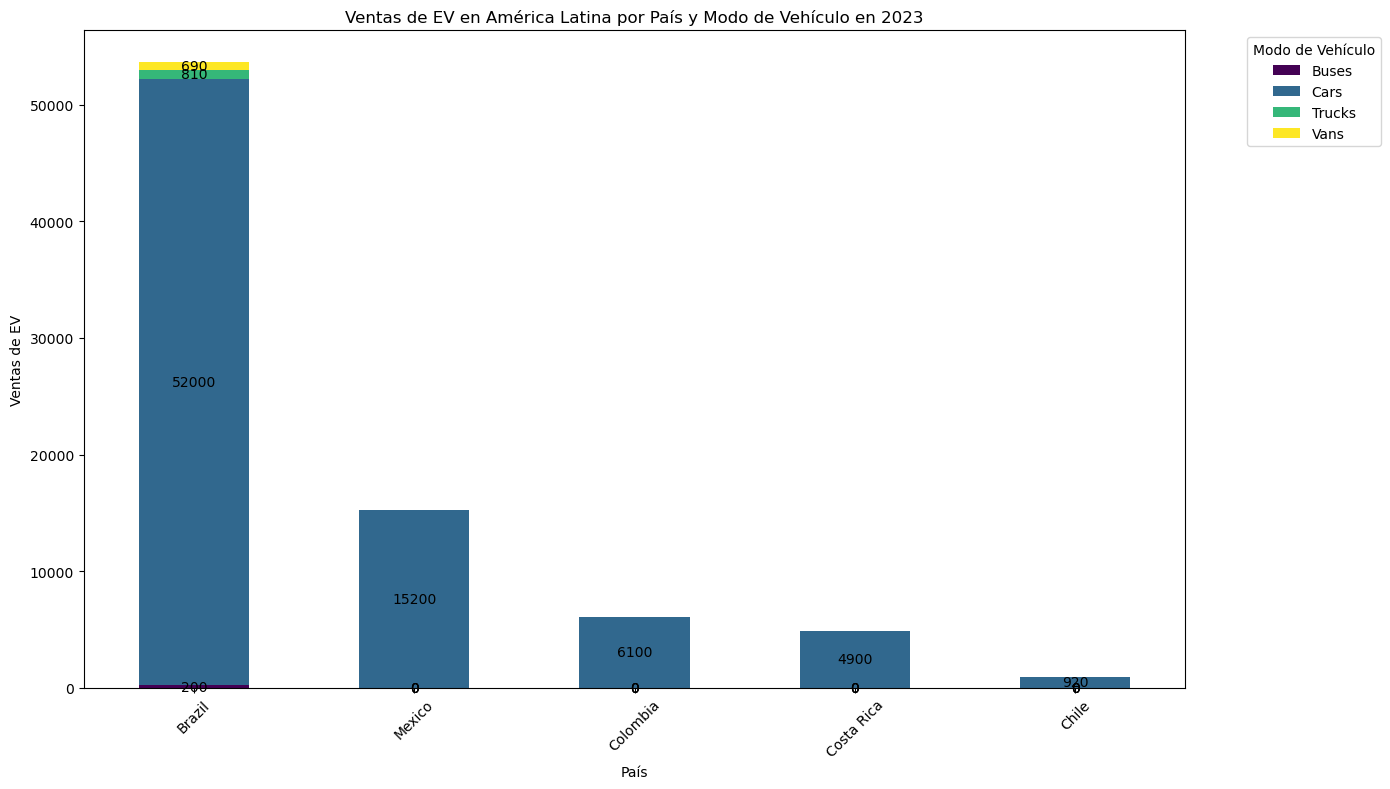

In [27]:
# Filtrar los datos para EV sales en Latam para el año 2023
filtered_ev_sales_latam_2023 = df_h[(df_h['parameter'] == 'EV sales') & 
                                    (df_h['region_category'] == 'Latam') & 
                                    (df_h['year'] == 2023)]

# Agrupar los datos por país y modo, y sumar las ventas
ev_sales_latam_2023_by_country_mode = filtered_ev_sales_latam_2023.groupby(['region', 'mode'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_2023_pivot = ev_sales_latam_2023_by_country_mode.pivot(index='region', columns='mode', values='value').fillna(0)

# Ordenar los países por las ventas totales
ev_sales_latam_2023_pivot['Total'] = ev_sales_latam_2023_pivot.sum(axis=1)
ev_sales_latam_2023_pivot = ev_sales_latam_2023_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Crear el gráfico de barras apiladas
ax = ev_sales_latam_2023_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Personalizar el gráfico
plt.title('Ventas de EV en América Latina por País y Modo de Vehículo en 2023')
plt.xlabel('País')
plt.ylabel('Ventas de EV')
plt.xticks(rotation=45)
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Si analizamos cuales son los paises que mas peso de electromovilidad en latinoamerica, podemos ver que los 5 principales son Brasil, Mexico, Costa Rica y Chile. La adopcion de la electromovilidad esta principalemente en los autos por sobre otro tipo de vehiculo.

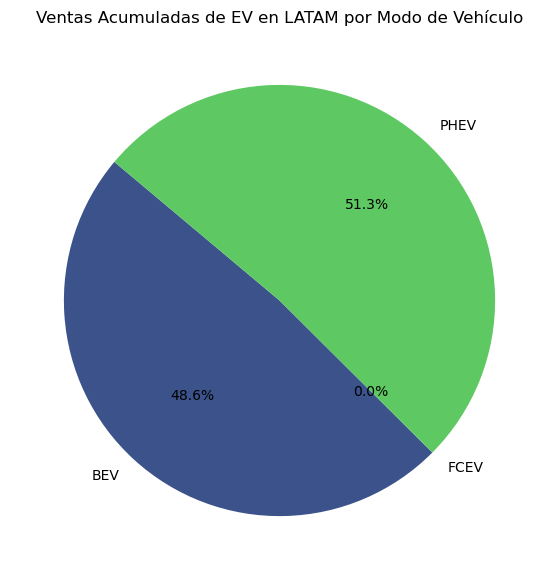

In [146]:
# Filtrar los datos para EV sales en Chile
filtered_ev_sales_chile = df_h[(df_h['parameter'] == 'EV sales') & (df_h['region_category'] == 'Latam')]


# Agrupar los datos por 'mode' y sumar las ventas totales
ev_sales_chile_by_mode = filtered_ev_sales_chile.groupby('powertrain')['value'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(ev_sales_chile_by_mode['value'], labels=ev_sales_chile_by_mode['powertrain'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(ev_sales_chile_by_mode)))

# Personalizar el gráfico
plt.title('Ventas Acumuladas de EV en LATAM por Modo de Vehículo')
plt.show()

Si queremos conocer como se distribuyen el total de vehiuclos electricos en Latam, vemos que un poco mas del 51% son vehiculos hibridos enchufables y el 48,6% corresponde a vehiculos full electricos

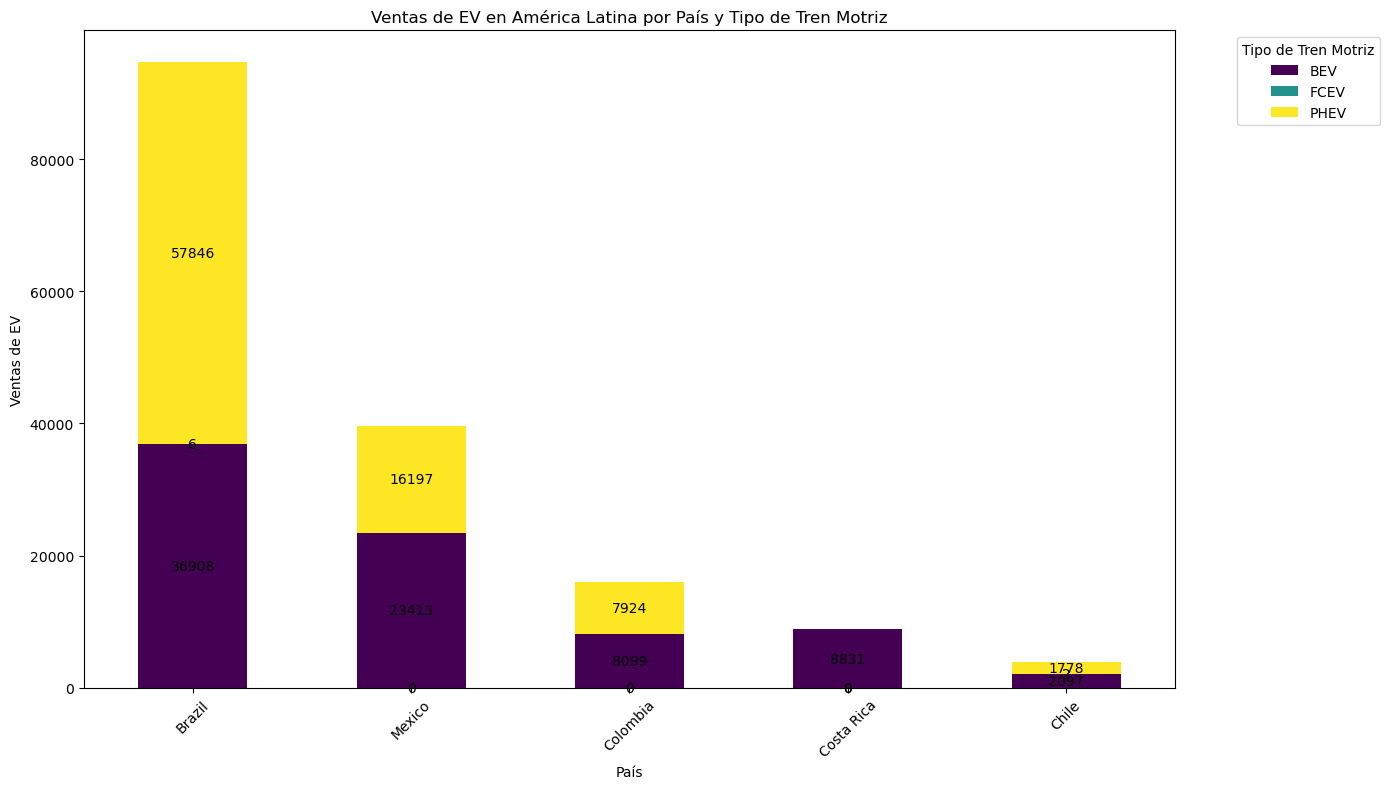

In [33]:
# Filtrar los datos para EV sales y Latam
filtered_ev_sales_latam = df_h[(df_h['parameter'] == 'EV sales') & 
                               (df_h['region_category'] == 'Latam')]

# Agrupar los datos por país y powertrain, y sumar las ventas
ev_sales_latam_by_country_powertrain = filtered_ev_sales_latam.groupby(['region', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_pivot = ev_sales_latam_by_country_powertrain.pivot(index='region', columns='powertrain', values='value').fillna(0)

# Ordenar los países por las ventas totales
ev_sales_latam_pivot['Total'] = ev_sales_latam_pivot.sum(axis=1)
ev_sales_latam_pivot = ev_sales_latam_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Crear el gráfico de barras apiladas
ax = ev_sales_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Personalizar el gráfico
plt.title('Ventas de EV en América Latina por País y Tipo de Tren Motriz')
plt.xlabel('País')
plt.ylabel('Ventas de EV')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Tren Motriz', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos identificar la misma tendencia de proporcion de tipo de vehiculos por pais, a excepcion de Costa Rica, donde el mayor porcentaje corresponde a Vehiculos Full Electricos

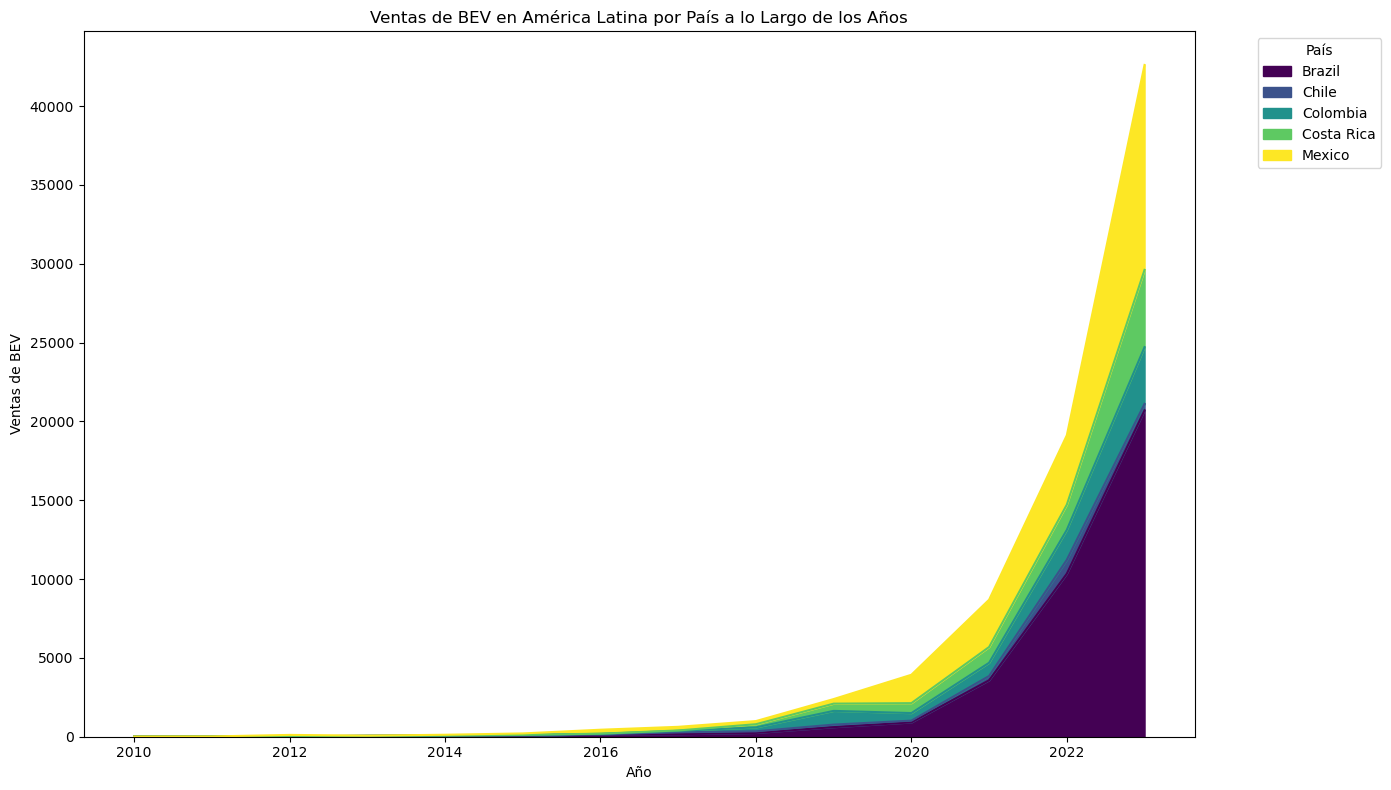

In [37]:
# Filtrar los datos para EV sales con powertrain BEV en Latam
filtered_ev_sales_latam_bev = df_h[(df_h['parameter'] == 'EV sales') & 
                                   (df_h['region_category'] == 'Latam') & 
                                   (df_h['powertrain'] == 'BEV')]

# Agrupar los datos por año y país, y sumar las ventas
ev_sales_latam_bev_by_year_country = filtered_ev_sales_latam_bev.groupby(['year', 'region'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_bev_pivot = ev_sales_latam_bev_by_year_country.pivot(index='year', columns='region', values='value').fillna(0)

# Crear el gráfico de área apilado
ev_sales_latam_bev_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de BEV en América Latina por País a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de BEV')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

para un analisis visual del crecimiento de los vehiculos electricos full electicos en la region, se puede identificar en el grafico la fuerza que ha tenido la electromovilidad los ultimos años especialmente en Brasil y Mexico

C:\Users\CL160369868\AppData\Local\Temp\ipykernel_34820\3301558287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='region', y='value', data=ev_charging_latam_by_country, palette='viridis')


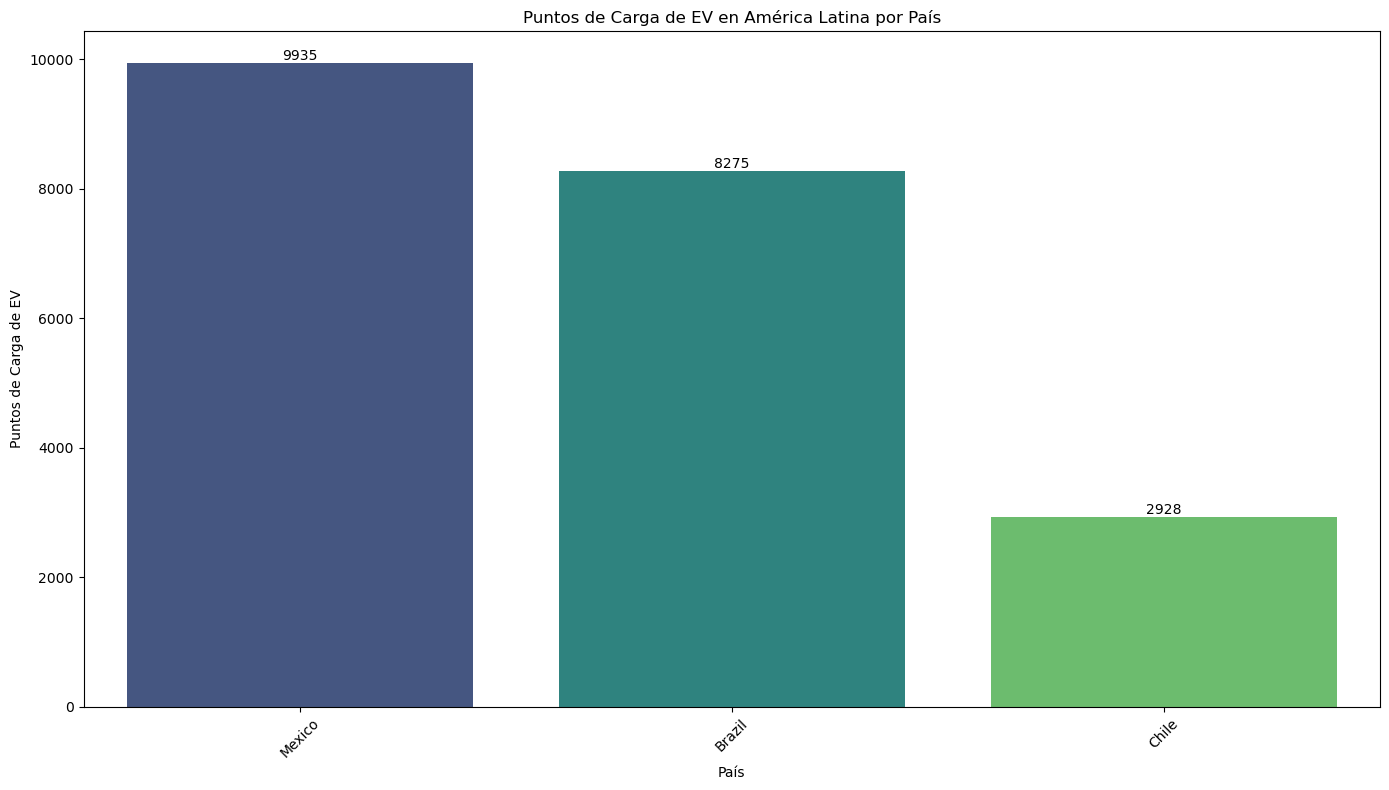

In [43]:
# Filtrar los datos para EV charging points en Latam
filtered_ev_charging_latam = df_h[(df_h['parameter'] == 'EV charging points') & 
                                  (df_h['region_category'] == 'Latam')]

# Agrupar los datos por país y año, y sumar los puntos de carga
ev_charging_latam_by_country = filtered_ev_charging_latam.groupby(['region'])['value'].sum().reset_index()

# Ordenar los países por los puntos de carga totales
ev_charging_latam_by_country = ev_charging_latam_by_country.sort_values(by='value', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='region', y='value', data=ev_charging_latam_by_country, palette='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

# Personalizar el gráfico
plt.title('Puntos de Carga de EV en América Latina por País')
plt.xlabel('País')
plt.ylabel('Puntos de Carga de EV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

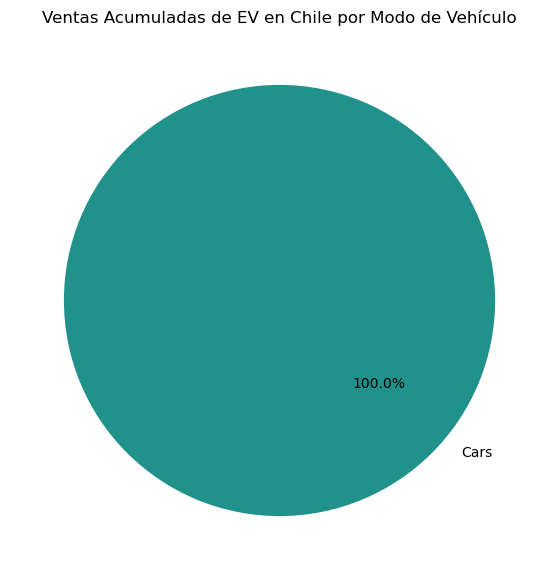

In [151]:
# Filtrar los datos para EV sales en Chile
filtered_ev_sales_chile = df_h[(df_h['parameter'] == 'EV sales') & (df_h['region'] == 'Chile')]


# Agrupar los datos por 'mode' y sumar las ventas totales
ev_sales_chile_by_mode = filtered_ev_sales_chile.groupby('mode')['value'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(ev_sales_chile_by_mode['value'], labels=ev_sales_chile_by_mode['mode'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(ev_sales_chile_by_mode)))

# Personalizar el gráfico
plt.title('Ventas Acumuladas de EV en Chile por Modo de Vehículo')
plt.show()

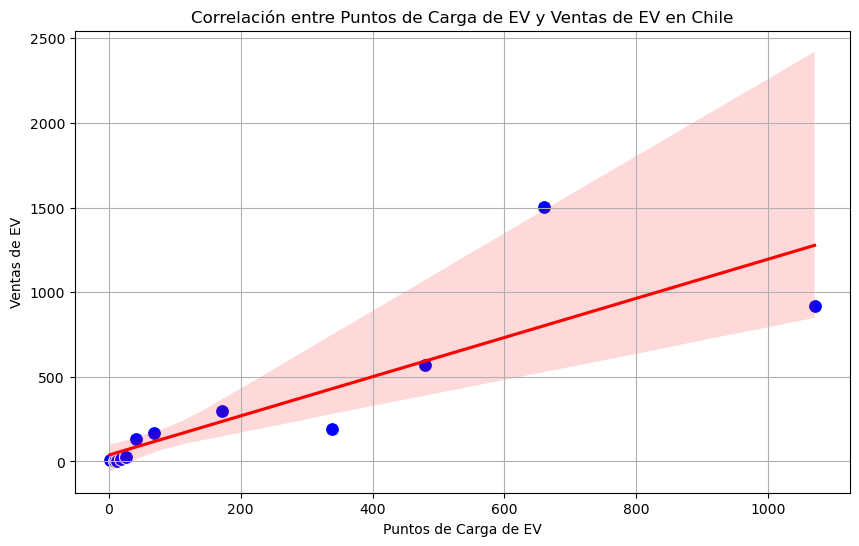

In [59]:

# Filtrar los datos para Chile
filtered_chile = df_h[df_h['region'] == 'Chile']


# Filtrar los datos para EV sales y EV charging points
ev_sales_chile = filtered_chile[filtered_chile['parameter'] == 'EV sales']
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'EV charging points']

# Agrupar los datos por año y sumar los valores
ev_sales_chile_by_year = ev_sales_chile.groupby('year')['value'].sum().reset_index()
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Combinar los dos DataFrames en uno solo
combined_chile = pd.merge(ev_sales_chile_by_year, ev_charging_chile_by_year, on='year', suffixes=('_sales', '_charging'))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_charging', y='value_sales', data=combined_chile, s=100, color='blue')

# Añadir una línea de regresión
sns.regplot(x='value_charging', y='value_sales', data=combined_chile, scatter=False, color='red')

# Personalizar el gráfico
plt.title('Correlación entre Puntos de Carga de EV y Ventas de EV en Chile')
plt.xlabel('Puntos de Carga de EV')
plt.ylabel('Ventas de EV')
plt.grid(True)
plt.show()

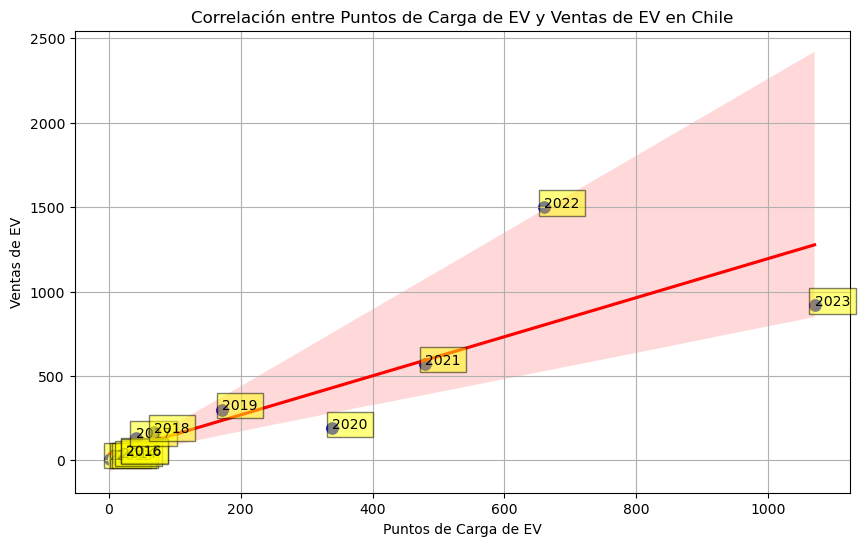

In [83]:

# Filtrar los datos para Chile
filtered_chile = df_h[df_h['region'] == 'Chile']

# Filtrar los datos para EV sales y EV charging points
ev_sales_chile = filtered_chile[filtered_chile['parameter'] == 'EV sales']
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'EV charging points']

# Agrupar los datos por año y sumar los valores
ev_sales_chile_by_year = ev_sales_chile.groupby('year')['value'].sum().reset_index()
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Combinar los dos DataFrames en uno solo
combined_chile = pd.merge(ev_sales_chile_by_year, ev_charging_chile_by_year, on='year', suffixes=('_sales', '_charging'))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_charging', y='value_sales', data=combined_chile, s=100, color='blue')

# Añadir una línea de regresión
sns.regplot(x='value_charging', y='value_sales', data=combined_chile, scatter=False, color='red')

# Añadir etiquetas de año a los puntos
for i in range(combined_chile.shape[0]):
    plt.text(x=combined_chile['value_charging'][i], y=combined_chile['value_sales'][i], s=combined_chile['year'][i], 
             fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Correlación entre Puntos de Carga de EV y Ventas de EV en Chile')
plt.xlabel('Puntos de Carga de EV')
plt.ylabel('Ventas de EV')
plt.grid(True)
plt.show()

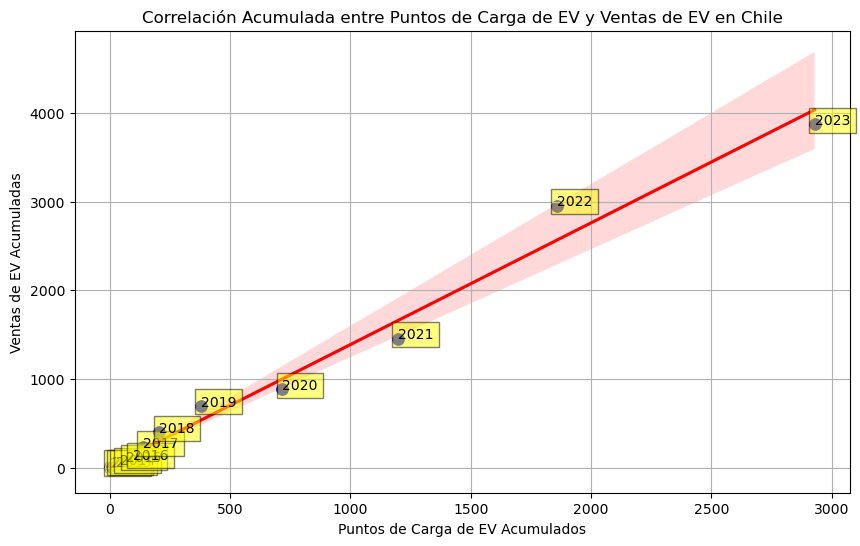

In [65]:


# Filtrar los datos para EV sales y EV charging points
ev_sales_chile = filtered_chile[filtered_chile['parameter'] == 'EV sales']
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'EV charging points']

# Agrupar los datos por año y sumar los valores
ev_sales_chile_by_year = ev_sales_chile.groupby('year')['value'].sum().reset_index()
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Calcular los valores acumulados
ev_sales_chile_by_year['cumulative_sales'] = ev_sales_chile_by_year['value'].cumsum()
ev_charging_chile_by_year['cumulative_charging'] = ev_charging_chile_by_year['value'].cumsum()

# Combinar los dos DataFrames en uno solo
combined_chile_cumulative = pd.merge(ev_sales_chile_by_year[['year', 'cumulative_sales']], 
                                     ev_charging_chile_by_year[['year', 'cumulative_charging']], 
                                     on='year')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cumulative_charging', y='cumulative_sales', data=combined_chile_cumulative, s=100, color='blue')

# Añadir una línea de regresión
sns.regplot(x='cumulative_charging', y='cumulative_sales', data=combined_chile_cumulative, scatter=False, color='red')

# Añadir etiquetas de año a los puntos
for i in range(combined_chile_cumulative.shape[0]):
    plt.text(x=combined_chile_cumulative['cumulative_charging'][i], y=combined_chile_cumulative['cumulative_sales'][i], 
             s=combined_chile_cumulative['year'][i], fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Correlación Acumulada entre Puntos de Carga de EV y Ventas de EV en Chile')
plt.xlabel('Puntos de Carga de EV Acumulados')
plt.ylabel('Ventas de EV Acumuladas')
plt.grid(True)
plt.show()

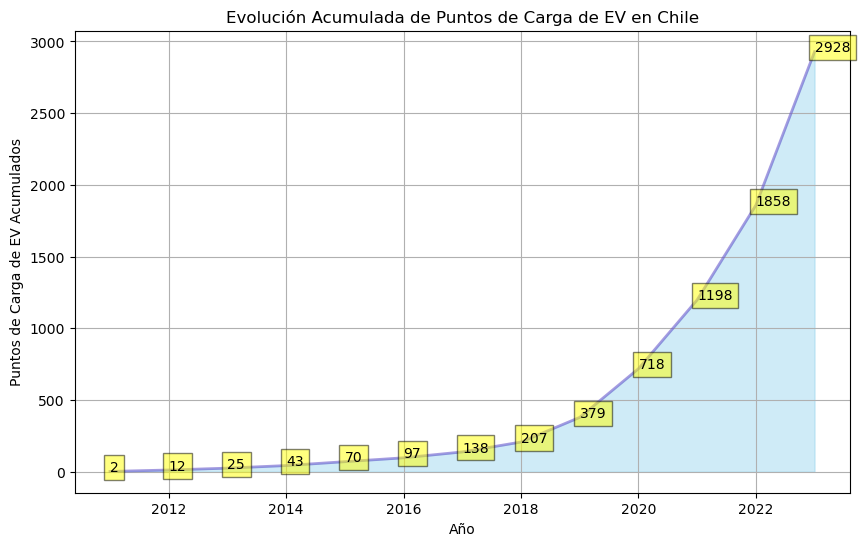

In [73]:
# Filtrar los datos para EV charging points
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'EV charging points']

# Agrupar los datos por año y sumar los valores
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Calcular los valores acumulados
ev_charging_chile_by_year['cumulative_charging'] = ev_charging_chile_by_year['value'].cumsum()

# Crear el gráfico de cinta
plt.figure(figsize=(10, 6))
plt.fill_between(ev_charging_chile_by_year['year'], ev_charging_chile_by_year['cumulative_charging'], color="skyblue", alpha=0.4)
plt.plot(ev_charging_chile_by_year['year'], ev_charging_chile_by_year['cumulative_charging'], color="Slateblue", alpha=0.6, linewidth=2)

# Añadir etiquetas de año a los puntos
for i in range(ev_charging_chile_by_year.shape[0]):
    plt.text(x=ev_charging_chile_by_year['year'][i], y=ev_charging_chile_by_year['cumulative_charging'][i], 
             s=str(int(ev_charging_chile_by_year['cumulative_charging'][i])), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Evolución Acumulada de Puntos de Carga de EV en Chile')
plt.xlabel('Año')
plt.ylabel('Puntos de Carga de EV Acumulados')
plt.grid(True)
plt.show()

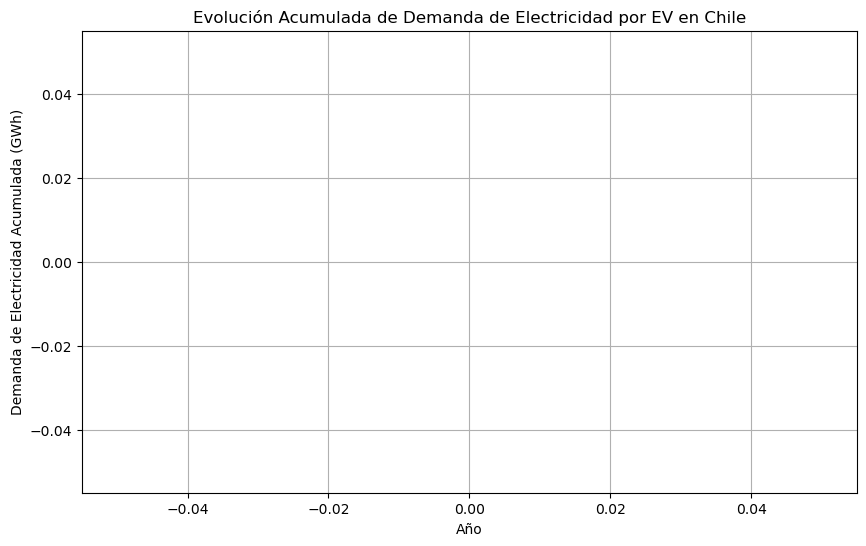

In [77]:
# Filtrar los datos para EV charging points
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'Electricity demand ']

# Agrupar los datos por año y sumar los valores
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Calcular los valores acumulados
ev_charging_chile_by_year['cumulative_charging'] = ev_charging_chile_by_year['value'].cumsum()

# Crear el gráfico de cinta
plt.figure(figsize=(10, 6))
plt.fill_between(ev_charging_chile_by_year['year'], ev_charging_chile_by_year['cumulative_charging'], color="skyblue", alpha=0.4)
plt.plot(ev_charging_chile_by_year['year'], ev_charging_chile_by_year['cumulative_charging'], color="Slateblue", alpha=0.6, linewidth=2)

# Añadir etiquetas de año a los puntos
for i in range(ev_charging_chile_by_year.shape[0]):
    plt.text(x=ev_charging_chile_by_year['year'][i], y=ev_charging_chile_by_year['cumulative_charging'][i], 
             s=str(int(ev_charging_chile_by_year['cumulative_charging'][i])), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Evolución Acumulada de Demanda de Electricidad por EV en Chile')
plt.xlabel('Año')
plt.ylabel('Demanda de Electricidad Acumulada (GWh)')
plt.grid(True)
plt.show()

,region,category,parameter,mode,powertrain,year,unit,value,region_category


In [89]:
filtered_chile = df_h[df_h['region'] == 'Chile']
filtered_chile

,region,category,parameter,mode,powertrain,year,unit,value,region_category
968,Chile,Historical,EV sales share,Cars,EV,2011,percent,0.00240,Latam
969,Chile,Historical,EV stock share,Cars,EV,2011,percent,0.00022,Latam
970,Chile,Historical,EV charging points,EV,Publicly available fast,2011,charging points,1.00000,Latam
971,Chile,Historical,EV charging points,EV,Publicly available slow,2011,charging points,1.00000,Latam
972,Chile,Historical,EV stock,Cars,BEV,2011,Vehicles,6.00000,Latam
...,...,...,...,...,...,...,...,...,...
1066,Chile,Historical,EV stock,Cars,PHEV,2023,Vehicles,1800.00000,Latam
1067,Chile,Historical,EV stock,Cars,BEV,2023,Vehicles,2100.00000,Latam
1068,Chile,Historical,EV sales,Cars,PHEV,2023,Vehicles,510.00000,Latam
1069,Chile,Historical,EV stock,Cars,FCEV,2023,Vehicles,2.00000,Latam


In [95]:
filtered_chile['parameter'].value_counts()

parameter
EV charging points    26
EV stock              26
EV sales              25
EV sales share        13
EV stock share        13
Name: count, dtype: int64